Challeng Questions:
    
It's time to revisit your classifier from the previous assignment. Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. 

Then go back and iterate by engineering new features, removing poor features, or tuning parameters. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:

Do any of your classifiers seem to overfit?

Which seem to perform the best? Why?

Which features seemed to be most impactful to performance?

Write up your iterations and answers to the above questions in a few pages. Submit a link below and go over it with your mentor to see if they have any other ideas on how you could improve your classifier's performance.


In [1]:
# import some packages and libraries:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
# Grab and read the raw data:
data_path = (r'C:\Users\mebra.DESKTOP-L12LJA6\Thinkful Works\PythonThinkful\sentiment labelled sentences\sentiment labelled sentences\amazon_cells_labelled.txt')
data_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
data_raw.columns=['message', 'sentiment']

In [3]:
data_raw.groupby('sentiment').count()
#baseline % = no. of dominant sentiment/no. of total sentiments*100

,message
sentiment,
0,500
1,500


For first step of feature engineering, Transforming the existing variables and making variables easier to understand. So, changing sentiment column to boolean to better understanding.

In [4]:
# Change to boolean, so we can easily do some statistics to prepare for modeling:
data_raw['sentiment']= (data_raw['sentiment']==1)

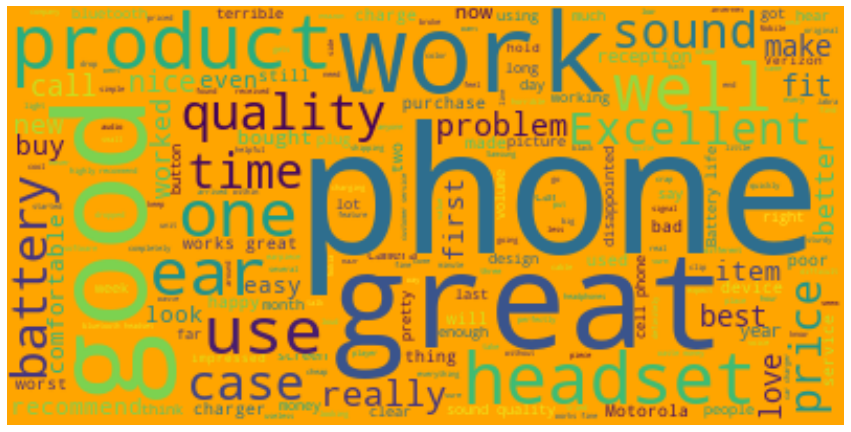

In [5]:
# Generate a word cloud image to findout most frequenty words.
wordcloud = WordCloud(background_color="orange").generate(" ".join(data_raw["message"]))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

For second step of feature engineering, Creating new variables because we believe will be useful in explaining our target.

First Version:

Messages are not feature, so we  can use feature engineer to make list of positive sentiment word as a feature. 
Thus, I make first version of feature engineering with popular positive words.


In [6]:
# Making feature engineer with positive sentiment words as a features:
data_raw1=data_raw.copy()
words = ['good', 'fantastic', 'excellent', 'great', 'well', 'best', 'fine', 'wonderful', 'satisfied', 'nice', 'love', 'impressed', 'comfortable', 'happy', 'pretty', 'amazing', 'friendly']
for word in words:
    data_raw1[str(word)] = data_raw1.message.str.contains(' ' + str(word) + ' ',case=False)
    

For the third step of feature engineering, Selecting the features by using correlation and heatmap plot to check for variable's independently because one of the main assumptions of Naive Bayes is that the variables fed into the model are independent of each other and they have not strong relation.

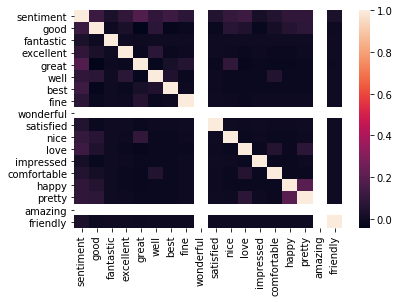

In [7]:
# Checking for variable's independently:
sns.heatmap(data_raw1.corr())

In [8]:
# choosing independent columns and sentiment column as a data and target variable:
data = data_raw1[words]
target = data_raw1['sentiment']

I use Bernoulli Naive Bayes classification, because the Naive Bayes is particularly good for text classification.

In [9]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier:
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable:
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)


# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 367


In [10]:
# Calculate the accuracy of the model:
print('Percentage of mislabeled is {}'.format(((target != y_pred).sum())*100/len(target)))
print('Percentage of correctly labeled is {}'.format(((target == y_pred).sum())*100/len(target)))

Percentage of mislabeled is 36.7
Percentage of correctly labeled is 63.3


63.3% of messages correctly classified  and 36.7% incorrectly classified.

Using Confusion Matrix to  analysis of your classifier which shows the count of each possible permutation of target and prediction:

In [11]:
# Using Confusion Matrix to  analysis of your classifier:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[477,  23],
       [344, 156]], dtype=int64)

The result shows the majority of our error is coming from times where we failed to identify a positive sentiment message. 344 of our 367 errors are for false negative that from failing to identify positive sentiment. So we need to get a little bit better at identifying positive sentiment messages. also, 23 of our 367 errors are for false positive that from failing to identify negative sentiment.Also, Sensitivity is the percentage of positives correctly identified, in our case 156/500 or 31.2% and Specificity is the percentage of negatives correctly identified, 477/500 or 95.4%. Again this confirms that we're not great at identifying positive sentiment messages.

Another potential source of error in our models is overfitting. Overfitting is when your model is so excessively complex that it starts to catch random noise instead of describing the true underlying relationships. so the simplest way to combat with overfitting is holdout groups.

In [12]:
# Test your model with different holdout groups:
# Use train_test_split to create the necessary training and test groups:

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)

print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))

print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.625
Testing on Sample: 0.633


These scores look really consistent, so It doesn't seem like our model is overfitting.

 Using Cross validation which is a more robust version of holdout groups to combat with overfitting.

In [13]:
# Using Cross validation:
cross_val_score(bnb, data, target, cv=10)

array([0.65, 0.61, 0.64, 0.61, 0.62, 0.64, 0.66, 0.62, 0.64, 0.59])

The array that cross_val_score returns is a series of accuracy scores with a different hold out group each time and our model is not overfitting at a variable amount, because those scores are relatively consistent.

Second Version:

Now I removing some features based on word cloud which have high frequently.


In [14]:
# Making feature engineer with positive sentiment word as a features:
data_raw2=data_raw.copy()
words2 = ['fantastic', 'fine', 'wonderful', 'satisfied', 'nice', 'love', 'impressed', 'comfortable', 'happy', 'pretty', 'amazing', 'friendly']
for word in words:
    data_raw2[str(word)] = data_raw2.message.str.contains(' ' + str(word) + ' ',case=False)
    

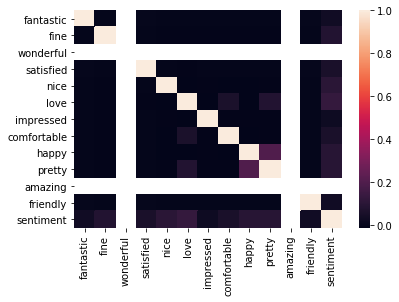

In [15]:
# Checking for variable's independently:
data_raw2 = data_raw2[words2+ ['sentiment']]
sns.heatmap(data_raw2.corr())

In [16]:
# choosing independent columns and sentiment column as data and target variable:
data = data_raw2[words2]
target = data_raw2['sentiment']

In [17]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier:
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable:
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)


# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 441


In [18]:
# Calculate the accuracy of the model:
print('Percentage of mislabeled is {}'.format(((target != y_pred).sum())*100/len(target)))
print('Percentage of correctly labeled is {}'.format(((target == y_pred).sum())*100/len(target)))

Percentage of mislabeled is 44.1
Percentage of correctly labeled is 55.9


In [19]:
# Using Confusion Matrix to  analysis of your classifier:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[493,   7],
       [434,  66]], dtype=int64)

In [20]:
# Using Cross validation:
cross_val_score(bnb, data, target, cv=10)

array([0.57, 0.55, 0.56, 0.53, 0.53, 0.56, 0.6 , 0.55, 0.54, 0.56])

Third Version:

Removing some features which have a bit relationships based on heatmap.  

In [21]:
# Making feature engineer with positive sentiment word as a features:
data_raw3=data_raw.copy()
words3 = ['good', 'fantastic', 'excellent', 'great', 'well', 'best', 'fine', 'wonderful', 'satisfied', 'nice', 'love', 'impressed', 'comfortable', 'amazing', 'friendly']
for word in words3:
    data_raw3[str(word)] = data_raw3.message.str.contains(' ' + str(word) + ' ',case=False)

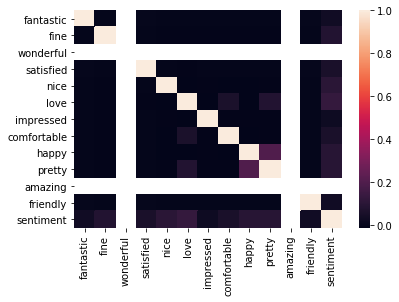

In [22]:
# Checking for variable's independently:
data_raw3 = data_raw3[words3+ ['sentiment']]
sns.heatmap(data_raw2.corr())

In [23]:
# choosing independent columns and sentiment column to data and target variable:
data = data_raw3[words3]
target = data_raw3['sentiment']

In [24]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier:
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable:
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)


# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 379


In [25]:
# Calculate the accuracy of the model:
print('Percentage of mislabeled is {}'.format(((target != y_pred).sum())*100/len(target)))
print('Percentage of correctly labeled is {}'.format(((target == y_pred).sum())*100/len(target)))

Percentage of mislabeled is 37.9
Percentage of correctly labeled is 62.1


In [26]:
# Using Confusion Matrix to  analysis of your classifier:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[478,  22],
       [357, 143]], dtype=int64)

In [27]:
# Test your model with different holdout groups:
# Use train_test_split to create the necessary training and test groups:

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)

print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))

print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.605
Testing on Sample: 0.621


In [28]:
# Using Cross validation:
cross_val_score(bnb, data, target, cv=10)

array([0.63, 0.62, 0.64, 0.6 , 0.6 , 0.63, 0.64, 0.61, 0.63, 0.56])

Forth Version:

Now I removing some features based on word cloud which have less frequently.

In [29]:
# Making feature engineer with positive sentiment word as a features:
data_raw4=data_raw.copy()
words4 = ['good', 'excellent', 'great', 'well', 'best', 'fine', 'wonderful', 'nice', 'comfortable', 'happy', 'pretty', 'amazing']
for word in words4:
    data_raw4[str(word)] = data_raw4.message.str.contains(' ' + str(word) + ' ',case=False)

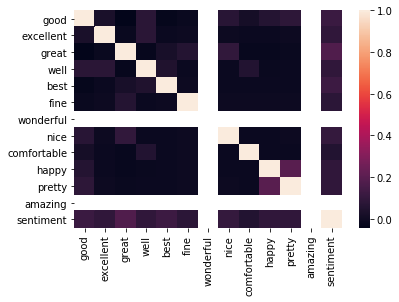

In [30]:
# Checking for variable's independently:
data_raw4 = data_raw4[words4+ ['sentiment']]
sns.heatmap(data_raw4.corr())

In [31]:
# choosing independent columns and sentiment column to data and target variable:
data = data_raw4[words4]
target = data_raw4['sentiment']

In [32]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier:
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable:
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)


# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 388


In [33]:
# Calculate the accuracy of the model:
print('Percentage of mislabeled is {}'.format(((target != y_pred).sum())*100/len(target)))
print('Percentage of correctly labeled is {}'.format(((target == y_pred).sum())*100/len(target)))

Percentage of mislabeled is 38.8
Percentage of correctly labeled is 61.2


In [34]:
# Using Confusion Matrix to  analysis of your classifier:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[480,  20],
       [368, 132]], dtype=int64)

In [35]:
# Test your model with different holdout groups:
# Use train_test_split to create the necessary training and test groups:

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)

print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))

print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.61
Testing on Sample: 0.612


In [36]:
# Using Cross validation:
cross_val_score(bnb, data, target, cv=10)

array([0.63, 0.6 , 0.61, 0.6 , 0.61, 0.62, 0.64, 0.61, 0.62, 0.58])

Last Version:

Keep only most frequently words which have a lot of frequently.


In [37]:
# Making feature engineer with positive sentiment word as a features:
data_raw5=data_raw.copy()
words5 = ['good', 'excellent', 'great', 'well']
for word in words5:
    data_raw5[str(word)] = data_raw.message.str.contains(' ' + str(word) + ' ',case=False)

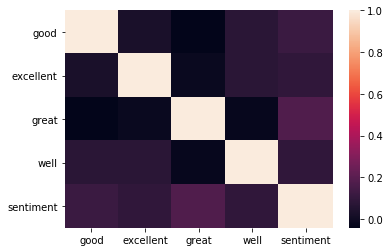

In [38]:
# Checking for variable's independently:
data_raw5 = data_raw5[words5+ ['sentiment']]
sns.heatmap(data_raw5.corr())

In [39]:
# choosing independent columns and sentiment column to data and target variable:
data = data_raw5[words5]
target = data_raw5['sentiment']

In [40]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier:
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable:
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)


# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 428


In [41]:
# Calculate the accuracy of the model:
print('Percentage of mislabeled is {}'.format(((target != y_pred).sum())*100/len(target)))
print('Percentage of correctly labeled is {}'.format(((target == y_pred).sum())*100/len(target)))

Percentage of mislabeled is 42.8
Percentage of correctly labeled is 57.2


In [42]:
# Using Confusion Matrix to  analysis of your classifier:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[484,  16],
       [412,  88]], dtype=int64)

In [43]:
# Test your model with different holdout groups:
# Use train_test_split to create the necessary training and test groups:

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)

print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))

print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.565
Testing on Sample: 0.572


In [44]:
# Using Cross validation:
cross_val_score(bnb, data, target, cv=10)

array([0.59, 0.58, 0.56, 0.58, 0.57, 0.59, 0.59, 0.54, 0.59, 0.53])

To answer these questions:

Do any of your classifiers seem to overfit?

I think in all versions, the array that cross_val_score returns is a series of accuracy scores with a different hold out group each time and our model is not overfitting at a variable amount, because those scores are relatively consistent.


Which seem to perform the best? Why?

I think the first version seems to perform the best, because based on confusion matrix the number of correctly labeled for negative sentiment is highest, because the number of features is more than others. So, It is more accurate, but still there are some errors like class imbalence.

Which features seemed to be most impactful to performance?

As you can see here, the second version of evaluation that remove features with high frequently seems to be impactful because decreasing the accuracy and sensitively.

